In [2]:
import pandas as pd
col_Names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']
df_heart = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning\
-databases/heart-disease/processed.cleveland.data',\
names=col_Names)
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
import numpy as np
df_heart.replace('?', np.nan, inplace=True)
df_heart=df_heart.dropna()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_heart, test_size=0.3, random_state=0,
stratify=df_heart['label'])
train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]
test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(train_X, train_Y)

pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF, test_Y))
print(classification_report(pred_RF, test_Y))


랜덤 포레스트 알고리즘 분류 정확도: 0.6
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        62
           1       0.31      0.24      0.27        21
           2       0.27      1.00      0.43         3
           3       0.09      0.50      0.15         2
           4       0.25      0.50      0.33         2

    accuracy                           0.60        90
   macro avg       0.37      0.59      0.40        90
weighted avg       0.72      0.60      0.64        90



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X, train_Y)

pred_knn = model2.predict(test_X)
print('KNN 알고리즘 분류 정확도:', metrics.accuracy_score(pred_knn, test_Y))
print(classification_report(pred_knn, test_Y))

KNN 알고리즘 분류 정확도: 0.4666666666666667
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        62
           1       0.12      0.11      0.11        19
           2       0.09      0.20      0.12         5
           3       0.09      0.25      0.13         4
           4       0.00      0.00      0.00         0

    accuracy                           0.47        90
   macro avg       0.22      0.23      0.21        90
weighted avg       0.58      0.47      0.51        90



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-d

In [22]:
from sklearn.svm import SVC
model3 = SVC(kernel='linear', random_state=0)
model3.fit(train_X, train_Y)

pred_svm = model3.predict(test_X)

print('SVM 알고리즘 분류 정확도:', metrics.accuracy_score(pred_svm, test_Y))
print(classification_report(pred_svm, test_Y))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM 알고리즘 분류 정확도: 0.6111111111111112
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.50      0.32      0.39        25
           2       0.18      0.33      0.24         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3

    accuracy                           0.61        90
   macro avg       0.32      0.30      0.30        90
weighted avg       0.70      0.61      0.65        90



(array([160.,  54.,  35.,  48.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

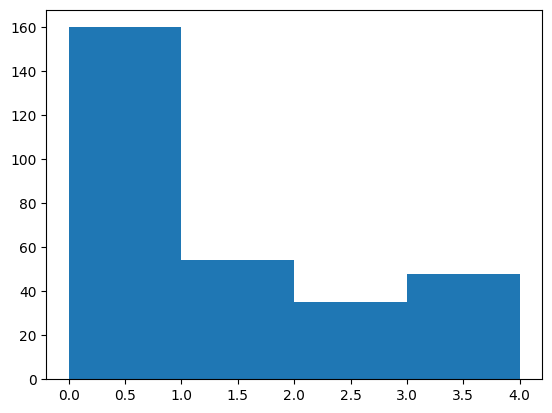

In [33]:
import matplotlib.pyplot as plt
plt.hist(df_heart.label, bins=4)

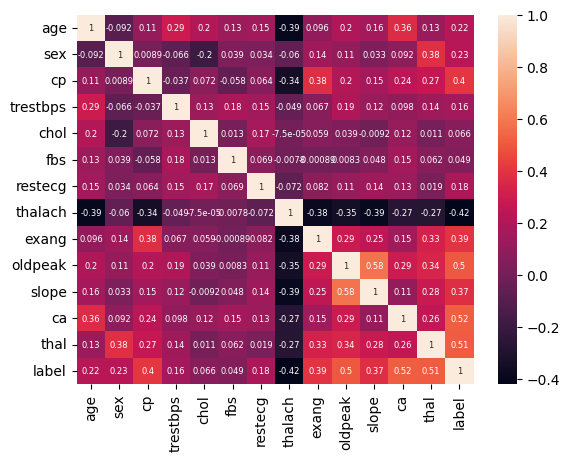

In [34]:
import seaborn as sns
ax = sns.heatmap(df_heart.corr( ), annot=True, annot_kws={"size":6})
plt.show( )

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 예측 정확도:', metrics.accuracy_score(pred_RF, test_Y))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


랜덤 포레스트 알고리즘 예측 정확도: 0.6
